<a href="https://colab.research.google.com/github/ZemelakGoraga/Data-Analytics-Capstone/blob/main/Copy_of_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project Topic: "Global Food Production Trends and Insights

**Description:**
This data analytics project aims to explore and analyze the FAOSTAT dataset, which encompasses a vast collection of time-series and cross-sectional data related to food and agriculture. The project will focus on understanding global food production trends by examining the production quantities of various food items across different countries and years. By leveraging this comprehensive dataset, the analysis will uncover patterns, variations, and potential factors influencing food production on a global scale. The insights gained from this analysis will contribute to informed decision-making in areas such as food security, sustainable agricultural practices, and policy formulation. Through data-driven exploration, this project seeks to shed light on the dynamics of food production and consumption, highlighting opportunities for targeted interventions and informed strategies to address challenges in the food and agriculture sector

In [ ]:
# Importing datasets from Kaggle
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [ ]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Aug 10 04:59 kaggle.json


In [ ]:
# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Next

# List a given datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


 99% 441M/444M [00:08<00:00, 93.5MB/s]
100% 444M/444M [00:08<00:00, 57.0MB/s]


In [ ]:
import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)


current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [ ]:
# Opening a specific file
import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = 'current_FAO/raw_files/CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv'

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1', sep=',', quotechar='"')

# Display first 5 rows
print(df.head())

['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [ ]:
# initial data profiling
# Display the shape of the DataFrame (number of rows and columns)
print("\nDataFrame shape:")
print(df.shape)

# Display basic information about the DataFrame
print("\nDataFrame info:")
print(df.info())

# Display basic summary statistics of numeric columns
print("\nSummary statistics:")
print(df.describe())



DataFrame shape:
(2459791, 11)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459791 entries, 0 to 2459790
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 206.4+ MB
None

Summary statistics:
          Area Code     Item Code  Element Code     Year Code          Year  \
count  2.459791e+06  2.459791e+06  2.459791e+06  2.459791e+06  2.459791e+06   
mean   1.251979e+03  2.798769e+03  5.405312e+03  1.987730e+03  1.987730e+03   
std    2.162616e+03  8.306858e+01  2.705903e+02  1.535588e+01  1.535588e+01   
min    1.000000e+00  2.731000e+03  5.071000e+03  1.961000e+03  1.961000e+03   
25

In [ ]:
# Examine data types, missing values, and potential data quality issues

# Display data types of columns
print("Data types of columns:")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)

# Check for potential data quality issues or inconsistencies
# For example, you can check for negative values in columns where they shouldn't exist
negative_values_columns = ['Value']  # Adjust with relevant columns
negative_values = df[negative_values_columns][df[negative_values_columns] < 0]
if not negative_values.empty:
    print("\nPotential data quality issues - Negative values:")
    print(negative_values)

Data types of columns:
Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

Missing values in each column:
Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

Unique values in 'Area':
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize'
 'Benin' 'Bermuda' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'C

In [ ]:
# Calculate summary statistics for numeric columns
summary_stats = df.describe(include='all')
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
           Area Code     Area     Item Code                     Item  \
count   2.459791e+06  2459791  2.459791e+06                  2459791   
unique           NaN      216           NaN                       38   
top              NaN    World           NaN  Milk - Excluding Butter   
freq             NaN    19049           NaN                   173274   
mean    1.251979e+03      NaN  2.798769e+03                      NaN   
std     2.162616e+03      NaN  8.306858e+01                      NaN   
min     1.000000e+00      NaN  2.731000e+03                      NaN   
25%     7.900000e+01      NaN  2.740000e+03                      NaN   
50%     1.510000e+02      NaN  2.762000e+03                      NaN   
75%     2.340000e+02      NaN  2.848000e+03                      NaN   
max     5.817000e+03      NaN  2.961000e+03                      NaN   

        Element Code                   Element     Year Code          Year  \
count   2.459791e+06                 

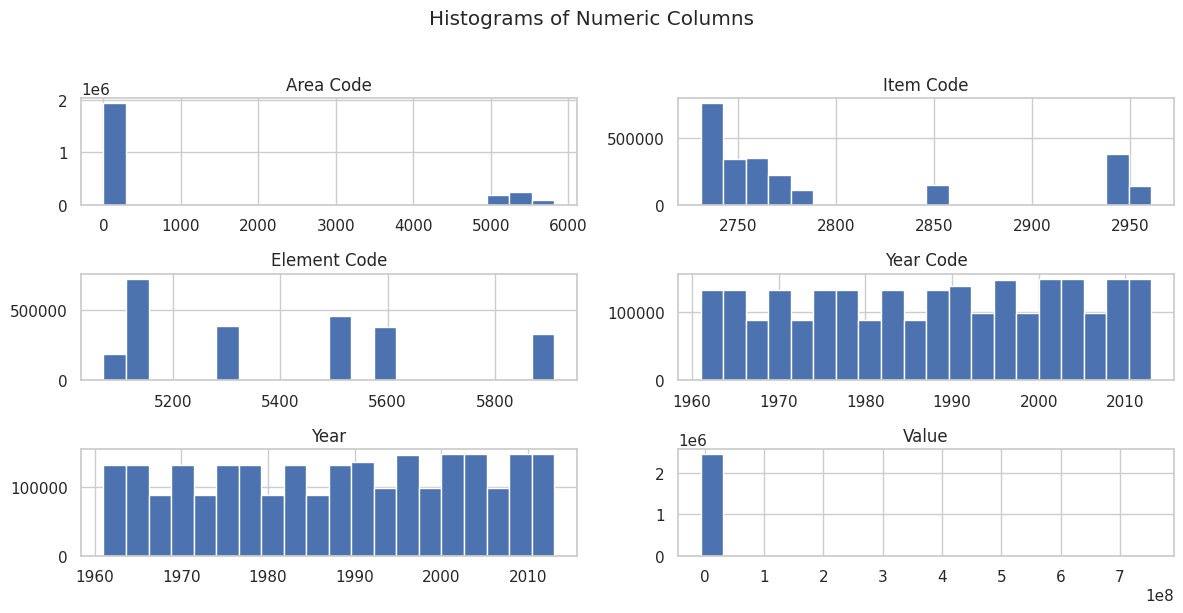

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualizations
sns.set(style="whitegrid")

# Generate histograms for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(bins=20, figsize=(12, 6))
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()




In [ ]:
# Generate scatter plots for numeric columns
scatter_columns = ['Year', 'Value']  # Replace with relevant column names
sns.pairplot(df[scatter_columns])
plt.suptitle("Scatter Plots of Year vs. Value", y=1.02)
plt.tight_layout()
plt.show()
